In [1]:
#import libraries
import pandas as pd
from scipy.stats.stats import spearmanr
import itertools
import matplotlib.pyplot as plt
import numpy

In [2]:
#import data
data_products = pd.read_csv("../data/products.csv")  
data_customer = pd.read_csv("../data/customer.csv") 
data_items = pd.read_csv("../data/items.csv") 
data_orders = pd.read_csv("../data/orders.csv") 

In [3]:
#Aperçu produits
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [4]:
#Aperçu clients
data_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#Aperçu items
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#Aperçu commandes
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
#Construction tableau d'analyse de contenu du panier
orders_extended = pd.merge(data_orders,data_items,'right',on=['order_id', 'order_id'])
orders_extended = pd.merge(orders_extended, data_products[['product_id','product_category_name']], 'right', on=['product_id', 'product_id'])
orders_extended.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,housewares
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery


In [8]:
#Résumé du prix par commande
orders_extended.groupby('order_id')['price'].transform('sum').describe()


count    112650.000000
mean        152.959595
std         257.339594
min           0.850000
25%          49.000000
50%          91.550000
75%         164.990000
max       13440.000000
Name: price, dtype: float64

In [9]:
#Résumé du nombre d'articles par commande
orders_extended['total_items'] = orders_extended.groupby('order_id')['order_item_id'].transform('max')
orders_extended['total_items'].describe()

count    112650.000000
mean          1.395668
std           1.120101
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: total_items, dtype: float64

In [10]:
#10 articles les plus achetés SEULS : Panier type
is_alone = orders_extended['total_items']==1
filtered_products = orders_extended[is_alone]['product_id']
top_results = filtered_products.value_counts().head(10)
top_results = top_results.reset_index(name='total_sales')
top_products = filtered_products.value_counts().index.tolist()

<BarContainer object of 10 artists>

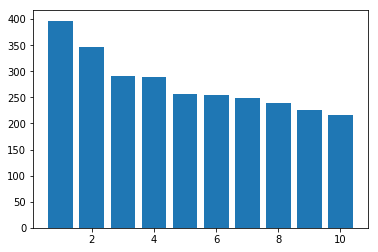

In [11]:
#Traçage du graphe
plt.bar([1,2,3,4,5,6,7,8,9,10], top_results['total_sales'])

In [12]:
#Liste des équivalences index-produits
top_results['relative_sales'] = top_results['total_sales'] / orders_extended['order_id'].count()
top_results

,index,total_sales,relative_sales
0,99a4788cb24856965c36a24e339b6058,397,0.003524
1,aca2eb7d00ea1a7b8ebd4e68314663af,346,0.003071
2,d1c427060a0f73f6b889a5c7c61f2ac4,291,0.002583
3,53b36df67ebb7c41585e8d54d6772e08,290,0.002574
4,154e7e31ebfa092203795c972e5804a6,256,0.002273
5,2b4609f8948be18874494203496bc318,254,0.002255
6,422879e10f46682990de24d770e7f83d,249,0.002210
7,3dd2a17168ec895c781a9191c1e95ad7,240,0.002130
8,389d119b48cf3043d311335e499d9c6b,225,0.001997
9,7c1bd920dbdf22470b68bde975dd3ccf,216,0.001917


In [13]:
print("On voit donc ici que plus de 75% des commandes sont à article unique. De plus, on peut voir sur la liste ci-dessus les produits seuls les plus fréquemment achetés. On peut donc en déduire qu'un panier type serait un panier à article unique contenant l'un de ces articles. Enfin on peut voir que le prix moyen d'un panier est de 153 euros.")

On voit donc ici que plus de 75% des commandes sont à article unique. De plus, on peut voir sur la liste ci-dessus les produits seuls les plus fréquemment achetés. On peut donc en déduire qu'un panier type serait un panier à article unique contenant l'un de ces articles. Enfin on peut voir que le prix moyen d'un panier est de 153 euros.


In [14]:
# Création de la liste des catégories des produits les plus achetés
categories_results = orders_extended['product_category_name'].value_counts().head(10)
categories_results = categories_results.reset_index(name='total_sales')
top_categories = orders_extended['product_category_name'].value_counts().index.tolist()

In [15]:
#Liste des catégories obtenues
categories_results

,index,total_sales
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


In [16]:
#Parsage des dates
sales_analysis_1 = data_orders
sales_analysis_1['order_purchase_timestamp'] = pd.to_datetime(sales_analysis_1['order_purchase_timestamp'])
sales_analysis_1['month'] = sales_analysis_1['order_purchase_timestamp'].dt.month
sales_analysis_1['year'] = sales_analysis_1['order_purchase_timestamp'].dt.year
sales_analysis_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2,2018


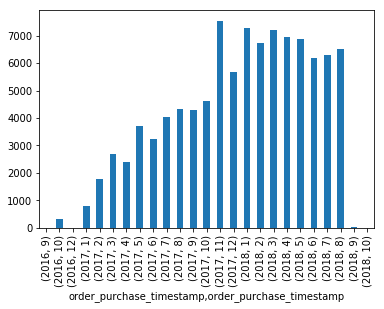

In [17]:
# Graphe du nombre de commandes
sales_analysis_1.groupby([sales_analysis_1["order_purchase_timestamp"].dt.year,sales_analysis_1["order_purchase_timestamp"].dt.month])["order_id"].count().plot(kind="bar")

In [18]:
#Parsage des dates
sales_analysis_2 = orders_extended
sales_analysis_2['order_purchase_timestamp'] = pd.to_datetime(sales_analysis_2['order_purchase_timestamp'])
sales_analysis_2['hour'] = sales_analysis_2['order_purchase_timestamp'].dt.hour
sales_analysis_2['month'] = sales_analysis_2['order_purchase_timestamp'].dt.month
sales_analysis_2['year'] = sales_analysis_2['order_purchase_timestamp'].dt.year
sales_analysis_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,total_items,hour,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,1,10,10,2017
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,housewares,1,18,8,2017
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,housewares,1,18,8,2017
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,housewares,1,23,10,2017
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,1,20,7,2018


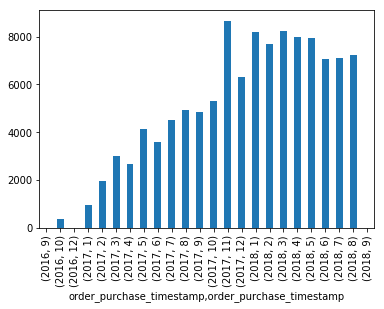

In [19]:
# Graphe du nombre d'items achetés
sales_analysis_2.groupby([sales_analysis_2["order_purchase_timestamp"].dt.year,sales_analysis_2["order_purchase_timestamp"].dt.month])["order_id"].count().plot(kind="bar")

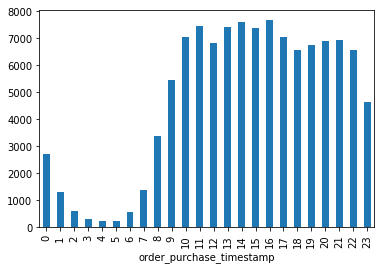

In [20]:
# Graphe du nombre d'items achetés par heure du jour
sales_analysis_2.groupby(sales_analysis_2["order_purchase_timestamp"].dt.hour)["order_id"].count().plot(kind="bar")

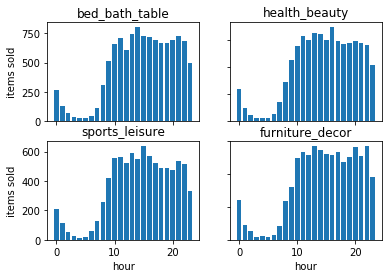

In [21]:
# Graphe du nombre d'items achetés par heure du jour en fonction de la catégorie produit

is_1 = sales_analysis_2['product_category_name'] == 'bed_bath_table'
x1 = sales_analysis_2[is_1]['hour'].value_counts().index.tolist()
y1 = sales_analysis_2[is_1]['hour'].value_counts()

is_2 = sales_analysis_2['product_category_name'] == 'health_beauty'
x2 = sales_analysis_2[is_2]['hour'].value_counts().index.tolist()
y2 = sales_analysis_2[is_2]['hour'].value_counts()

is_3 = sales_analysis_2['product_category_name'] == 'sports_leisure'
x3 = sales_analysis_2[is_3]['hour'].value_counts().index.tolist()
y3 = sales_analysis_2[is_3]['hour'].value_counts()

is_4 = sales_analysis_2['product_category_name'] == 'furniture_decor'
x4 = sales_analysis_2[is_4]['hour'].value_counts().index.tolist()
y4 = sales_analysis_2[is_4]['hour'].value_counts()

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(x1, y1)
axs[0, 0].set_title('bed_bath_table')
axs[0, 1].bar(x2, y2)
axs[0, 1].set_title('health_beauty')
axs[1, 0].bar(x3, y3)
axs[1, 0].set_title('sports_leisure')
axs[1, 1].bar(x4, y4)
axs[1, 1].set_title('furniture_decor')

for ax in axs.flat:
    ax.set(xlabel='hour', ylabel='items sold')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

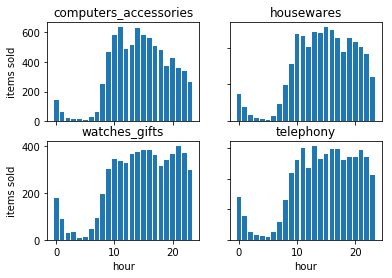

In [22]:
# Graphe du nombre d'items achetés par heure du jour en fonction de la catégorie produit

is_5 = sales_analysis_2['product_category_name'] == 'computers_accessories'
x5 = sales_analysis_2[is_5]['hour'].value_counts().index.tolist()
y5 = sales_analysis_2[is_5]['hour'].value_counts()

is_6 = sales_analysis_2['product_category_name'] == 'housewares'
x6 = sales_analysis_2[is_6]['hour'].value_counts().index.tolist()
y6 = sales_analysis_2[is_6]['hour'].value_counts()

is_7 = sales_analysis_2['product_category_name'] == 'watches_gifts'
x7 = sales_analysis_2[is_7]['hour'].value_counts().index.tolist()
y7 = sales_analysis_2[is_7]['hour'].value_counts()

is_8 = sales_analysis_2['product_category_name'] == 'telephony'
x8 = sales_analysis_2[is_8]['hour'].value_counts().index.tolist()
y8 = sales_analysis_2[is_8]['hour'].value_counts()

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(x5, y5)
axs[0, 0].set_title('computers_accessories')
axs[0, 1].bar(x6, y6)
axs[0, 1].set_title('housewares')
axs[1, 0].bar(x7, y7)
axs[1, 0].set_title('watches_gifts')
axs[1, 1].bar(x8, y8)
axs[1, 1].set_title('telephony')

for ax in axs.flat:
    ax.set(xlabel='hour', ylabel='items sold')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [23]:
# Création d'un dataframe en vue de comparer statistiquement
data = {'1': y1,'2': y2,'3': y3,'4': y4,'5': y5,'6': y6,'7': y7,'8': y8}
hour_category = pd.DataFrame(data) 
hour_category.head(10)

,1,2,3,4,5,6,7,8
0,268,242,208,243,144,147,181,139
1,132,96,117,92,63,79,91,77
2,69,49,52,55,24,33,31,24
3,32,26,28,14,15,16,33,15
4,26,20,12,24,18,11,8,12
5,26,22,17,16,9,8,13,8
6,42,50,57,29,25,27,47,26
7,111,140,131,81,64,95,92,60
8,308,293,255,237,253,197,195,132
9,510,456,418,322,466,310,305,219


In [24]:
# Vérification via coefficient de corrélation de Spearman
correlations = {}
columns = hour_category.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = spearmanr(hour_category.loc[:, col_a], hour_category.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

           PCC       p-value
1__2  0.945858  3.140344e-12
1__3  0.926723  8.008626e-11
1__4  0.912807  5.076131e-10
1__5  0.870624  3.181211e-08
1__6  0.921505  1.665223e-10
1__7  0.952153  8.303964e-13
1__8  0.943249  5.206069e-12
2__3  0.940870  8.087786e-12
2__4  0.895652  3.372534e-09
2__5  0.917391  2.864148e-10
2__6  0.946087  3.000427e-12
2__7  0.891498  5.079068e-09
2__8  0.931304  4.023039e-11
3__4  0.851304  1.338461e-07
3__5  0.938261  1.284526e-11
3__6  0.966957  1.516437e-14
3__7  0.904979  1.259006e-09
3__8  0.918261  2.559977e-10
4__5  0.812174  1.441257e-06
4__6  0.851304  1.338461e-07
4__7  0.887584  7.360338e-09
4__8  0.903478  1.485223e-09
5__6  0.947826  2.109019e-12
5__7  0.805827  2.012546e-06
5__8  0.853043  1.186033e-07
6__7  0.891498  5.079068e-09
6__8  0.910435  6.743245e-10
7__8  0.902805  1.598090e-09


In [25]:
print("On ne voit pas de différences significatives entre les achats des différentes catégories de produits selon l'heure (coefficients proches de 1)")

On ne voit pas de différences significatives entre les achats des différentes catégories de produits selon l'heure (coefficients proches de 1)


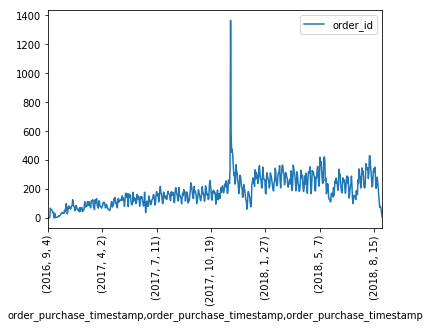

In [26]:
# On crée le dataset pour réaliser la prédiction
data_predict = pd.DataFrame(sales_analysis_2.groupby([sales_analysis_2["order_purchase_timestamp"].dt.year,sales_analysis_2["order_purchase_timestamp"].dt.month,sales_analysis_2["order_purchase_timestamp"].dt.day])["order_id"].count())
data_predict.plot(rot=90)

In [27]:
# On crée la colonne des différences des valeurs (suppression des tendances)
data_predict["diff"] = data_predict['order_id'].shift() - data_predict['order_id']
data_diff = data_predict.drop("order_id", axis=1)

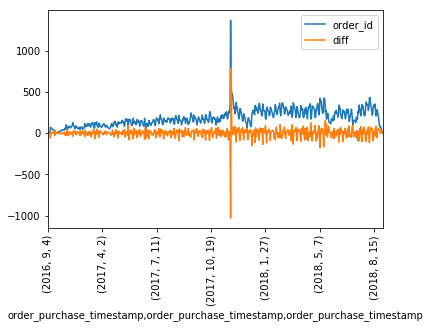

In [28]:
data_predict.plot(rot=90)

In [29]:
# On crée le dataframe des lagged values (utilisée pour de la prédiction de time series)
# On testera ici avec 8 lagged colonnes
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression
lag = 8
X = lagmat(data_predict["diff"], lag)
lagged = data_predict.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
lagged.head(10)

order_id  \
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp             
2016                     9                        4                                2   
                                                  5                                1   
                                                  15                               3   
                         10                       2                                1   
                                                  3                                8   
                                                  4                               69   
                                                  5                               56   
                                                  6                               58   
                                                  7                               52   
                                                  8                               45   

                                                                            diff  \
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp         
2016                     9                        4                          NaN   
                                                  5                          1.0   
                                                  15                        -2.0   
                         10                       2                          2.0   
                                                  3                         -7.0   
                                                  4                        -61.0   
                                                  5                         13.0   
                                                  6                         -2.0   
                                                  7                          6.0   
                                                  8                          7.0   

                                                                            lag1  \
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp         
2016                     9                        4                          0.0   
                                                  5                          NaN   
                                                  15                         1.0   
                         10                       2                         -2.0   
                                                  3                          2.0   
                                                  4                         -7.0   
                                                  5                        -61.0   
                                                  6                         13.0   
                                                  7                         -2.0   
                                                  8                          6.0   

                                                                            lag2  \
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp         
2016                     9                        4                          0.0   
                                                  5                          0.0   
                                                  15                         NaN   
                         10                       2                          1.0   
                                                  3                         -2.0   
                                                  4                          2.0   
                                                  5                         -7.0   
                                                  6                        -61.0   
                                                  7                         13.0   
                                                  8                         -

In [30]:
# On découpe le dataset en un ensemble de test et un ensemble d'entraînement
xc = ["lag%d" % i for i in range(1,lag+1)]
split = 0.66
isplit = int(len(lagged) * split)
xt = lagged[10:][xc]
yt = lagged[10:]["diff"]
X_train, y_train, X_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]

In [31]:
# On peut maintenant faire du machine learning sur la série décalé.
# On utilise ici une régression linéaire
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# On calcule le coefficient r2 pour attester de la qualité de la prédiction
from sklearn.metrics import r2_score
r2 = r2_score(y_test.values, clr.predict(X_test))
r2

0.1422000439905886

In [33]:
print("On voit ici que le coefficient R2 est relativement bas : la prédiction n'est pas de très bonne qualité.")

On voit ici que le coefficient R2 est relativement bas : la prédiction n'est pas de très bonne qualité.


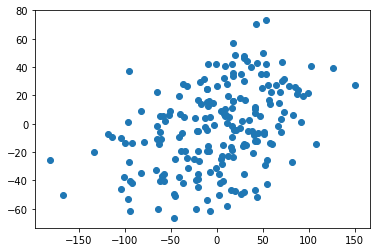

In [34]:
# On utilise un graphe de corrélation afin d'avoir un aperçu graphique de la qualité des résultats
plt.scatter(y_test.values, clr.predict(X_test))

In [35]:
print('On peut voir ici graphiquement que les résultats suivent la bonne tendance mais nécéssitent d\'être améliorés.')

On peut voir ici graphiquement que les résultats suivent la bonne tendance mais nécéssitent d'être améliorés.


In [36]:
# On construit le dataframe accueillant les résultats de la prédiction
value_predict = data_predict.iloc[isplit+9]['order_id']
final_df = pd.DataFrame()
diff_predicted = pd.DataFrame(clr.predict(X_test))
final_df['real_values'] = data_predict[isplit+9:]['order_id']
final_df.head(10)

real_values
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp             
2018                     2                        11                                188
                                                  12                                250
                                                  13                                263
                                                  14                                345
                                                  15                                316
                                                  16                                245
                                                  17                                224
                                                  18                                234
                                                  19                                295
                                                  20                                315

In [37]:
# On consrtuit la colonne des résultats prédits
num = 0
for index, element in final_df.iterrows():
    final_df.loc[index,'predicted_values'] = value_predict
    if (num <= len(diff_predicted[0])-1):
        value_predict = value_predict + diff_predicted[0][num]
        num = num + 1
final_df.head(10)

real_values  \
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp                
2018                     2                        11                                188   
                                                  12                                250   
                                                  13                                263   
                                                  14                                345   
                                                  15                                316   
                                                  16                                245   
                                                  17                                224   
                                                  18                                234   
                                                  19                                295   
                                                  20                                315   

                                                                            predicted_values  
order_purchase_timestamp order_purchase_timestamp order_purchase_timestamp                    
2018                     2                        11                              188.000000  
                                                  12                              147.790943  
                                                  13                              145.288183  
                                                  14                              154.326823  
                                                  15                              202.443807  
                                                  16                              232.434574  
                                                  17                              227.701078  
                                                  18                              212.219393  
                                                  19                              201.250148  
                                                  20                              218.194994

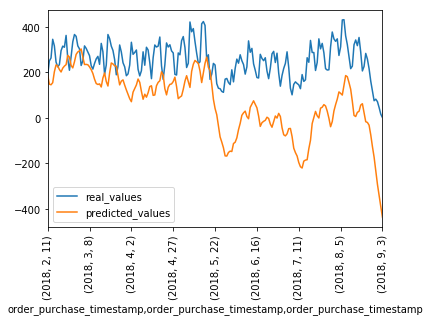

In [38]:
# On peut maintenant représenter graphiquement ces résultats
final_df.plot(rot=90)